# MAT281 - Tarea 2

**Indicaciones**:

* En los **Ejercicio 1-8** puedes utilizar tanto `matplotlib` como `altair` según te parezca más conveniente o cómodo, en ambos casos cada gráfico debe tener elementos mínimos como:
    - Título
    - Nombre de los ejes, leyendas, etc. en formato _amigable_/_humano_, por ejemplo, si la columna del dataframe en cuestión tiene por nombre `casos_confirmados` se espera que el eje del gráfico tenga por nombre `Casos confirmados`.
    - Colores adecuados al tipo de datos.
    - Un tamaño adecuado para ver con facilidad en una pantalla con resolución HD o FullHD.
    - Cada vez que no se cumplan alguna de estos requerimientos se descontará __1 punto__ de la nota final.

* Para el **Ejercicio 9** es obligación utilizar `altair`.
* Cada ejercicio debe estar acompañado con una celda con comentarios o análisis que puedas desprender de los gráficos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets

from datetime import date
from ipywidgets import interactive, interact

pd.set_option('display.max_columns', 999)
alt.data_transformers.disable_max_rows()
alt.themes.enable('opaque')

%matplotlib inline

**COVID-19 en Chile** 

En esta tarea exploraremos los datos de Covid-19 en Chile a profundidad. Las siguientes celdas cargarán los datos a utilizar en tu sesión. Es importante que leas la documentación de cada conjunto de datos para comprender las columnas.

In [2]:
start_date = pd.to_datetime("2020-04-13")

In [3]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto6
confirmados = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto6/bulk/data.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
    .dropna()
    .astype({"casos_confirmados": np.float, "tasa": np.float})
)

confirmados.head()

,poblacion,casos_confirmados,fecha,region_id,region,provincia_id,provincia,comuna_id,comuna,tasa
0,247552.0,270.0,2020-04-27,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,109.067994
1,247552.0,9138.0,2020-10-12,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,3691.345657
2,247552.0,596.0,2020-05-29,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,240.757497
3,247552.0,6131.0,2020-08-17,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,2476.651370
4,247552.0,353.0,2020-05-11,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,142.596303


In [4]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto19
activos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto19/CasosActivosPorComuna.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .loc[lambda x: x["codigo_comuna"].notnull()]
    .melt(id_vars=["region", "codigo_region", "comuna", "codigo_comuna", "poblacion"], var_name="fecha", value_name="casos_activos")
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
)

activos.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,fecha,casos_activos
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-04-13,88.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-04-13,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-04-13,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-04-13,0.0
4,Tarapaca,1,Alto Hospicio,1107.0,129999.0,2020-04-13,8.0


In [5]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto14
fallecidos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["region"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos.head()

,region,fecha,fallecidos
374,Arica y Parinacota,2020-04-13,1.0
375,Tarapacá,2020-04-13,0.0
376,Antofagasta,2020-04-13,1.0
377,Atacama,2020-04-13,0.0
378,Coquimbo,2020-04-13,0.0


In [6]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto10
fallecidos_etareo = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["grupo_de_edad"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
        grupo_de_edad=lambda x: x["grupo_de_edad"].str.replace("<=39", "0-39")
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos_etareo.head()

,grupo_de_edad,fecha,fallecidos
28,0-39,2020-04-13,3
29,40-49,2020-04-13,2
30,50-59,2020-04-13,3
31,60-69,2020-04-13,12
32,70-79,2020-04-13,29


## Ejercicio 1

(10 puntos)

Mostrar cantidad de fallecidos a la fecha por cada grupo etáreo.

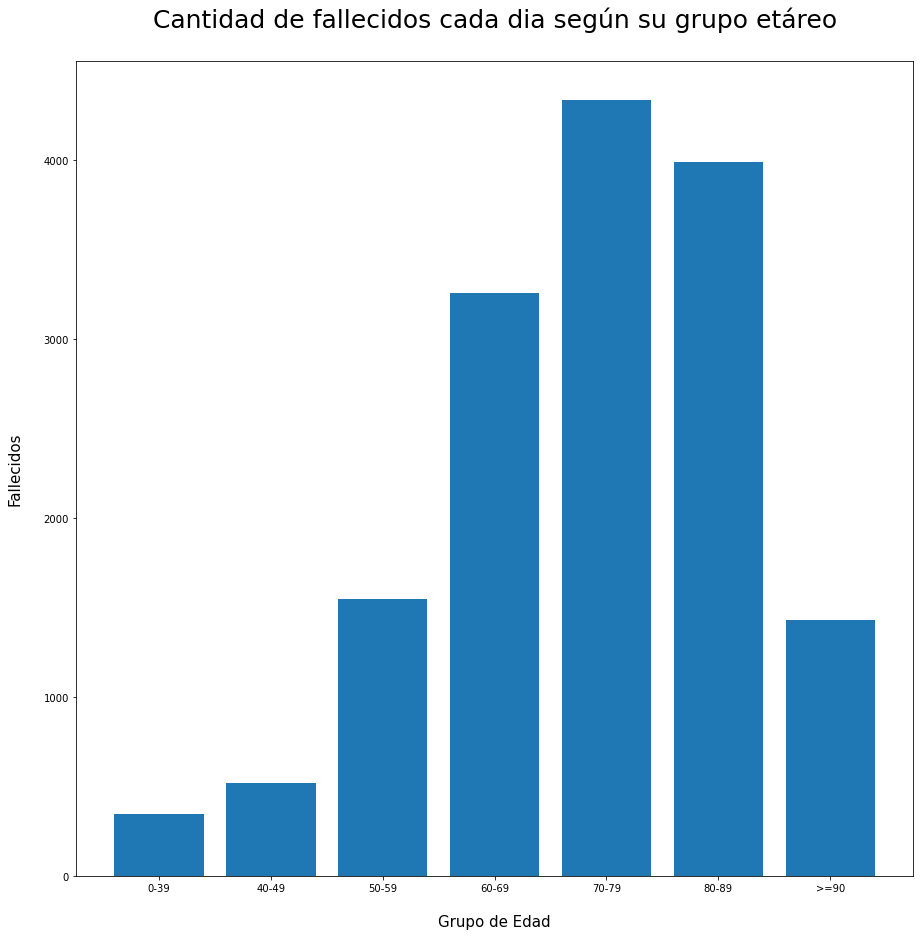

In [7]:
from datetime import timedelta

def to_str(date):
    return np.datetime_as_string(date, unit='D')

dates = list(map(to_str, fallecidos_etareo['fecha'].unique()))

last_date = date.today()
while True:
    today = last_date.strftime('%Y-%m-%d')
    if today in dates:
        break
    last_date = last_date - timedelta(days = 1)
    
df = fallecidos_etareo[fallecidos_etareo['fecha']==today]

fig = plt.figure(figsize=(15,15))

plt.bar(df['grupo_de_edad'], df['fallecidos'])

plt.title('Cantidad de fallecidos cada dia según su grupo etáreo\n', fontsize=25)
plt.xlabel('\nGrupo de Edad', fontsize=15)
plt.ylabel('Fallecidos\n', fontsize=15)
plt.show()

**Comentarios:** Se aprecia una mortalidad alta para personas mayores a 60 años, que corresponden a la mayoría de los decesos en el país.

## Ejercicio 2

(10 puntos)

¿Qué tan variable es la población de las comunas de Chile? Considera utilizar un gráfico que resuma de buena forma la información sin agregar la variable de región o provincia.

De un total de 346 comunas, el 50% de la población del país vive en las 35 comunas más pobladas, es decir, en el 10.12% de las comunas.


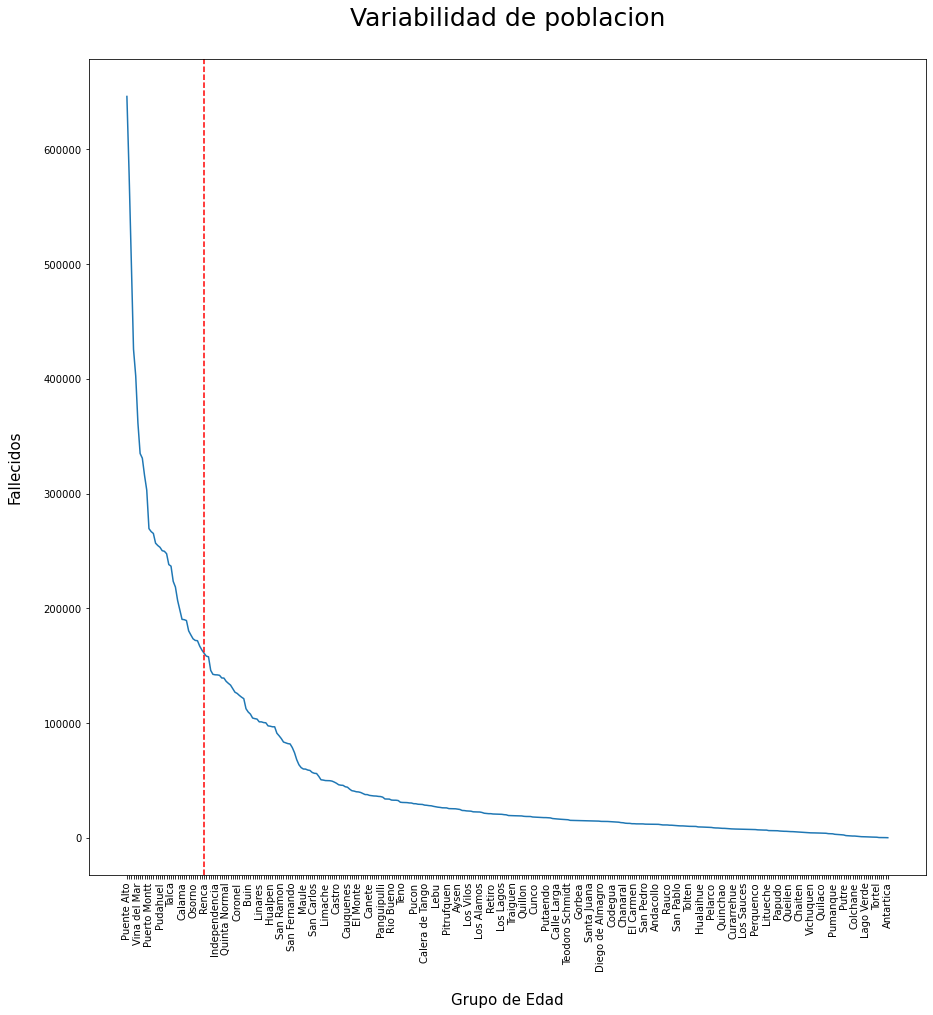

In [8]:
def create_ticks(i, string):
    if i%5 == 0:
        return string
    else:
        return ''

dates = list(map(to_str, activos['fecha'].unique()))
last_date = date.today()
while True:
    today = last_date.strftime('%Y-%m-%d')
    if today in dates:
        break
    last_date = last_date - timedelta(days = 1)



df = activos[activos['fecha']==today].sort_values(by=['poblacion'], ascending=False)
df['acumulado'] = [sum(df['poblacion'][:i+1])/sum(df['poblacion'])*100 for i in range(len(df['poblacion']))]
aux_ticks = [list(df['comuna'])[0]] + [create_ticks(i, list(df['comuna'])[i]) for i in range(1,len(df['comuna'])-1)] + [list(df['comuna'])[-1]]
                 
porc = round(len(df[df['acumulado'] < 50])/len(df['acumulado'])*100,2)
tporc = len(df[df['acumulado'] < 50])
total = len(df['acumulado'])
print(f'De un total de {total} comunas, el 50% de la población del país vive en las {tporc} comunas más pobladas, es decir, en el {porc}% de las comunas.')

fig = plt.figure(figsize=(15,15))

ax = plt.plot(df['comuna'], df['poblacion'])
plt.xticks(df['comuna'], aux_ticks, rotation='vertical')

plt.title('Variabilidad de poblacion\n', fontsize=25)
plt.xlabel('\nGrupo de Edad', rotation=0, fontsize=15)
plt.ylabel('Fallecidos\n', fontsize=15)
plt.axvline(x = 'Renca', color='red', linestyle='--')

plt.show()

**Comentarios:** Se observa como un porcentaje inferior de comunas poseen gran parte de la población del país. En particular, de un total de 346 comunas, el 50% de la población del país vive en las 35 comunas más pobladas, es decir, en el 10.12% de las comunas. La linea segmentada roja en el gráfico corresponde a la mediana de los datos: Las comunas de la derecha poseen la misma población que las comunas de la izquierda.

## Ejercicio 3

(10 puntos)

Mostrar evolución y comparación de los fallecimientos entre distintos grupos etáreos, pero que al mismo tiempo sea fácil identificar la cantidad de fallecidos total en cada fecha.

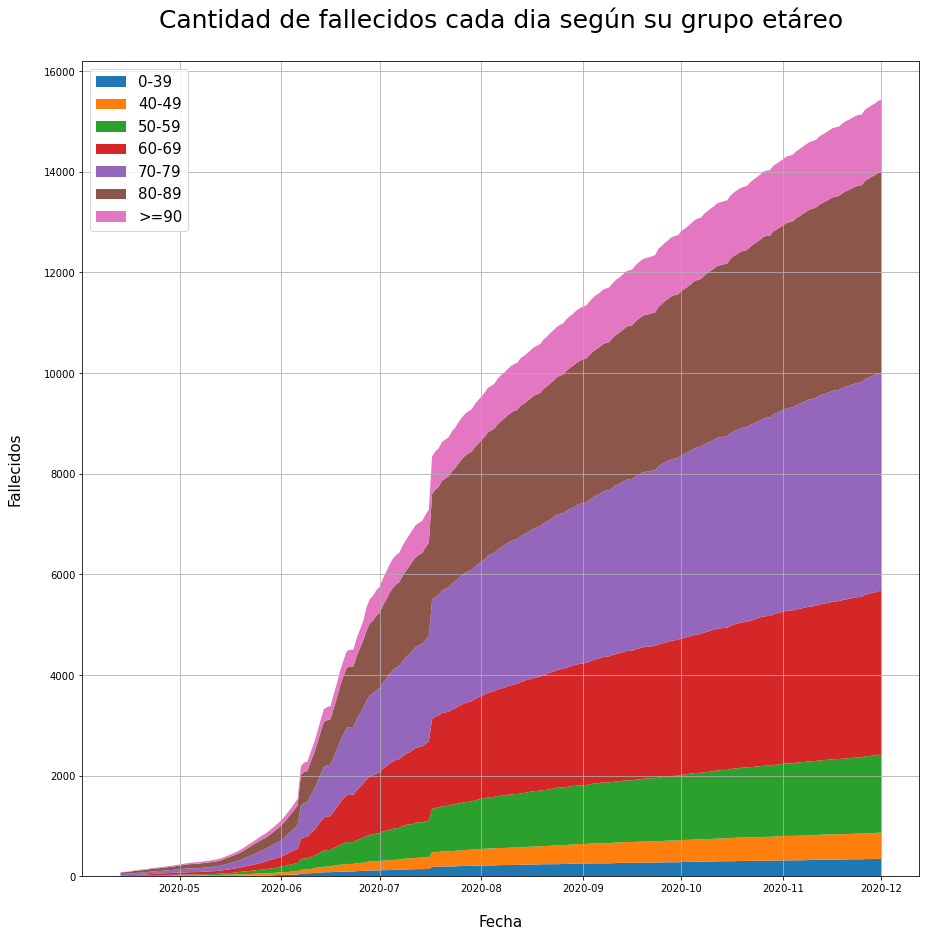

In [9]:
fig = plt.figure(figsize=(15,15))

grupos_de_edad = list(fallecidos_etareo['grupo_de_edad'].unique())

df = fallecidos_etareo.pivot(index='fecha', columns='grupo_de_edad', values='fallecidos').reset_index()

plt.stackplot(df['fecha'], df['0-39'], df['40-49'], df['50-59'], df['60-69'], df['70-79'], df['80-89'], df['>=90'], labels=grupos_de_edad)

plt.grid()
plt.legend(fontsize=15, loc='upper left')
plt.title('Cantidad de fallecidos cada dia según su grupo etáreo\n', fontsize=25)
plt.xlabel('\nFecha', fontsize=15)
plt.ylabel('Fallecidos\n', fontsize=15)
plt.show()

**Comentarios:** Se observa que identificar la cantidad de decesos por fecha es fácilmente identificable, a la vez que se pueden comparar los fallecimientos por grupo etario.

## Ejercicio 4

(10 puntos)

Mostrar en tres gráficos la evolución de casos confirmados, evolución de fallecimientos y evolución de casos activos.

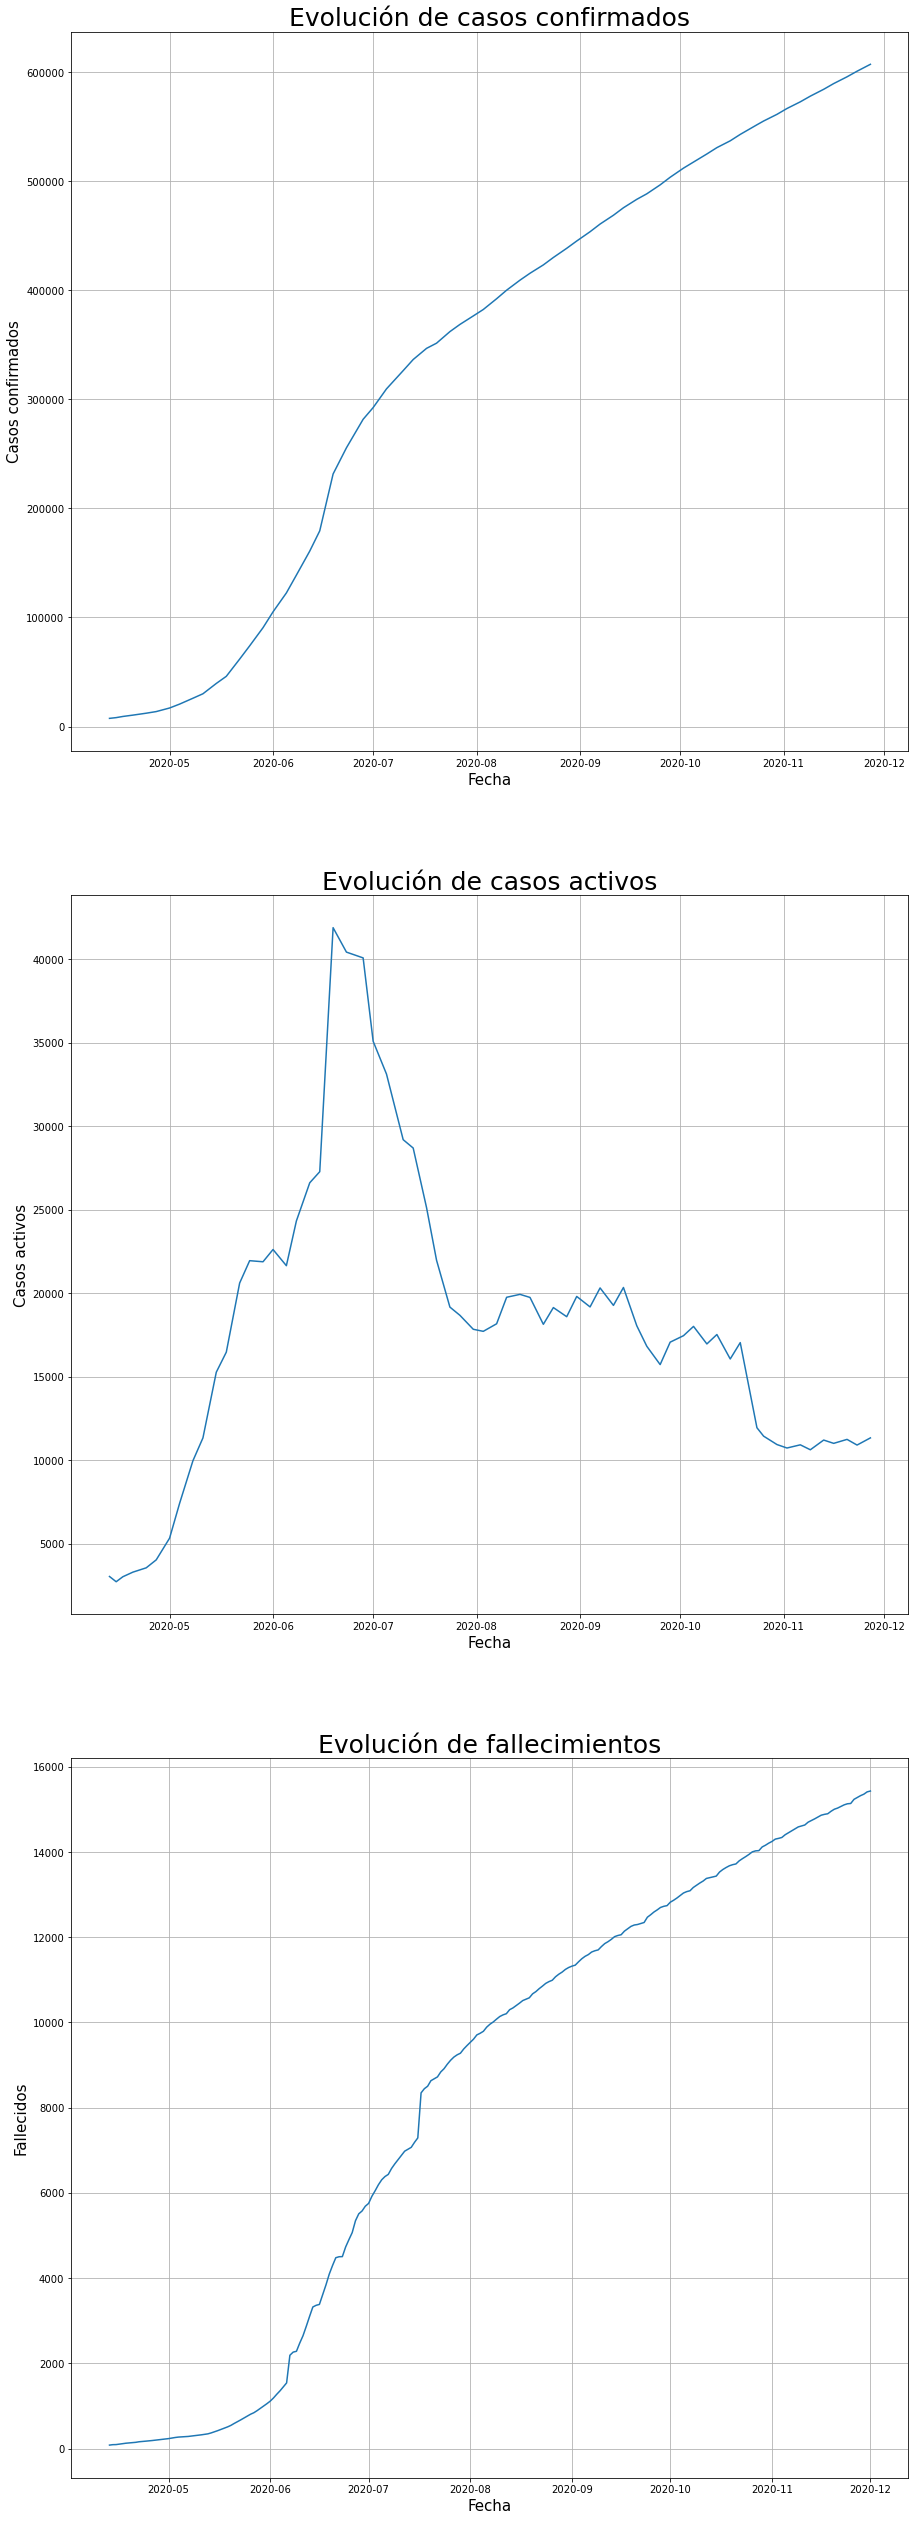

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15,45))

confirmados_group = (confirmados.groupby('fecha').sum().reset_index())
activos_group = (activos.groupby('fecha').sum().reset_index())
fallecidos_group = (fallecidos_etareo.groupby('fecha').sum().reset_index())

ax1.plot(confirmados_group['fecha'], confirmados_group['casos_confirmados'])
ax1.set_title('Evolución de casos confirmados', fontsize=25)
ax1.set_xlabel('Fecha', fontsize=15)
ax1.set_ylabel('Casos confirmados', fontsize=15)
ax1.grid()

ax2.plot(activos_group['fecha'], activos_group['casos_activos'])
ax2.set_title('Evolución de casos activos', fontsize=25)
ax2.set_xlabel('Fecha', fontsize=15)
ax2.set_ylabel('Casos activos', fontsize=15)
ax2.grid()

ax3.plot(fallecidos_group['fecha'], fallecidos_group['fallecidos'])
ax3.set_title('Evolución de fallecimientos', fontsize=25)
ax3.set_xlabel('Fecha', fontsize=15)
ax3.set_ylabel('Fallecidos', fontsize=15)
ax3.grid()

plt.show()

**Comentarios:** A partir de estos gráficos, se puede deducir que el peak de la enfermedad se encontró entre los meses de junio y julio.

## Ejercicio 5

(10 puntos)

Comparar la tasa de incidencia entre las regiones a lo largo del tiempo.

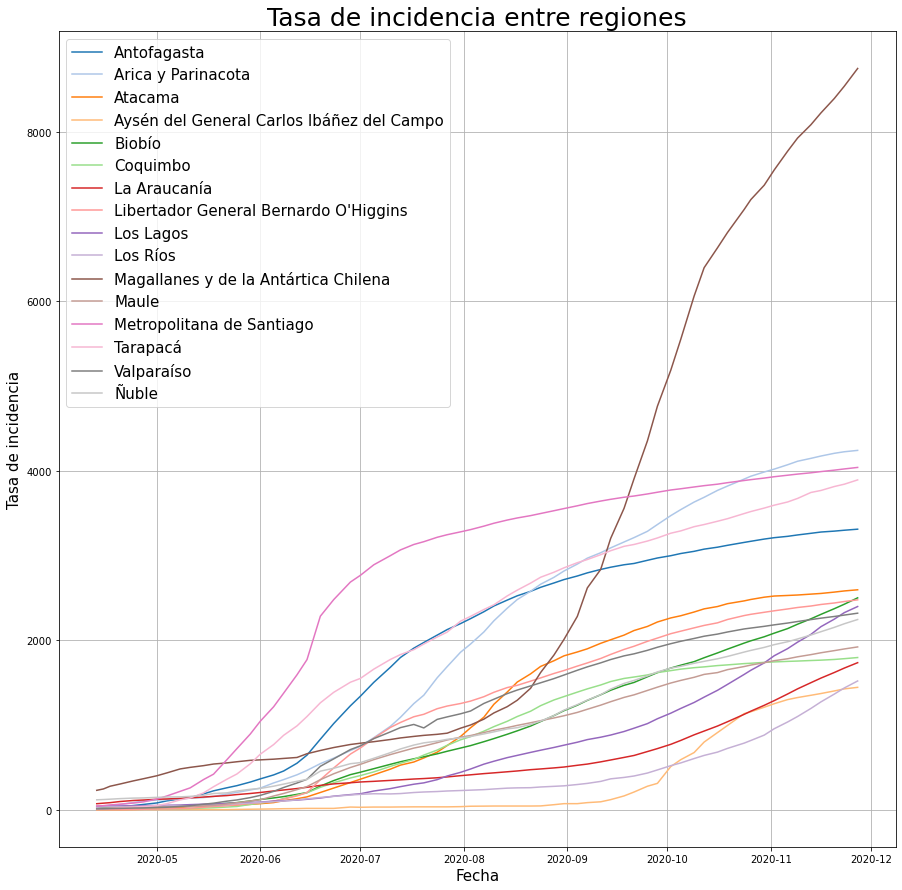

In [11]:
confirmados_group = (confirmados.groupby(['region','fecha']).sum().reset_index())
confirmados_group['tasa'] = (confirmados_group['casos_confirmados'] / confirmados_group['poblacion'] * 100000)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cm = plt.get_cmap('tab20')

i = 0
for region in confirmados_group['region'].unique():
    df = confirmados_group[confirmados_group['region'] == region]
    lines = ax.plot(df['fecha'], df['tasa'], label = region)
    lines[0].set_color(cm(i))
    i += 1
    
plt.legend(fontsize=15, loc='upper left')
plt.title('Tasa de incidencia entre regiones', fontsize=25)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Tasa de incidencia', fontsize=15)
plt.grid()
plt.show()

**Comentario**: A partir de la gráfica, se puede observar la complejidad de la situación en la región de Magallanes, donde su tasa de incidencia ha venido en aumento desde Septiembre.

## Ejercicio 6

(10 puntos)

¿Hay alguna conclusión que puedas obtener rápidamente al graficar un _scatter plot_ con los casos confirmados y tasa de incidencia de cada comuna para los días 13 de abril y 6 de noviembre del 2020? Además, colorea cada punto según la región a la que pertenece y considera si es útil en el gráfico que el tamaño sea proporcional a la población.

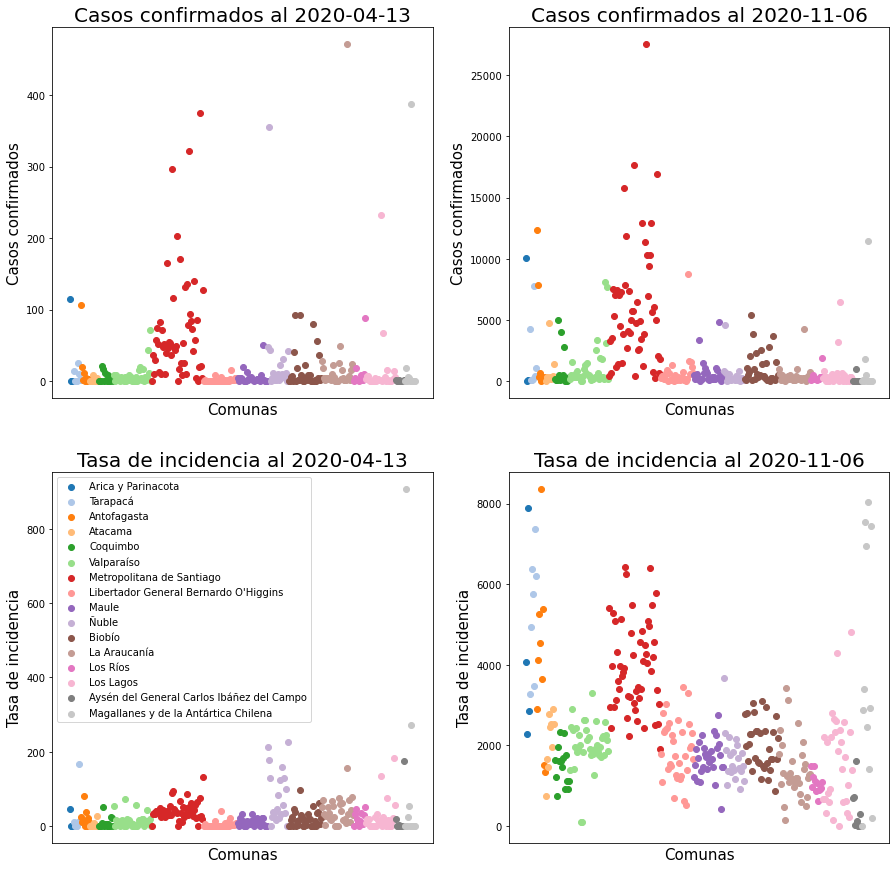

In [12]:
dict_names = {'casos_confirmados': 'Casos confirmados', 'tasa': 'Tasa de incidencia'}
start_date = '2020-04-13'
end_date = '2020-11-06'

fig, ax = plt.subplots(2, 2, figsize=(15,15))
cm = plt.get_cmap('tab20')

j = 0
for column in ['casos_confirmados', 'tasa']:
    i = 0
    for region in confirmados['region'].unique():
        df = confirmados[confirmados['region'] == region]
        
        df_d = df[df['fecha'] == start_date]
        lines1 = ax[j,0].scatter(df_d['comuna'], df_d[column], label = region)
        lines1.set_color(cm(i))
        ax[j,0].set_title(f'{dict_names[column]} al {start_date}', fontsize=20)
        ax[j,0].set_xlabel('Comunas', fontsize=15)
        ax[j,0].set_ylabel(dict_names[column], fontsize=15)
        ax[j,0].set_xticks([], minor=False)
        ax[j,0].grid()

        df_d = df[df['fecha'] == end_date]
        lines2 = ax[j,1].scatter(df_d['comuna'], df_d[column], label = region)
        lines2.set_color(cm(i))
        ax[j,1].set_title(f'{dict_names[column]} al {end_date}', fontsize=20)
        ax[j,1].set_xlabel('Comunas', fontsize=15)
        ax[j,1].set_ylabel(dict_names[column], fontsize=15)
        ax[j,1].set_xticks([], minor=False)
        ax[j,1].grid()
        i += 1
    j += 1

ax[1,0].legend(loc='upper left')
plt.show()

**Comentarios:** Al inicio de la toma de datos, se puede apreciar que la cantidad de casos confirmados nos permite obtener mayor información sobre las comunas afectadas, esto es puesto que las tasas de incidencia son bajas. Ahora bien, y considerando que la pandemia ha avanzado, se tiene que la tasa de incidencia nos permite obtener mayor información del impacto de la enfermedad en las distintas comunas, puesto que están normalizadas y calculadas para cien mil habitantes.

## Ejercicio 7

(10 puntos)

1. Grafica la evolución de los casos activos de cada comuna en un solo gráfico. 
2. Grafica la evolución de los casos activos de cada comuna en gráficos separados por región.

Entrega los pros y contras de cada uno de estos enfoques.

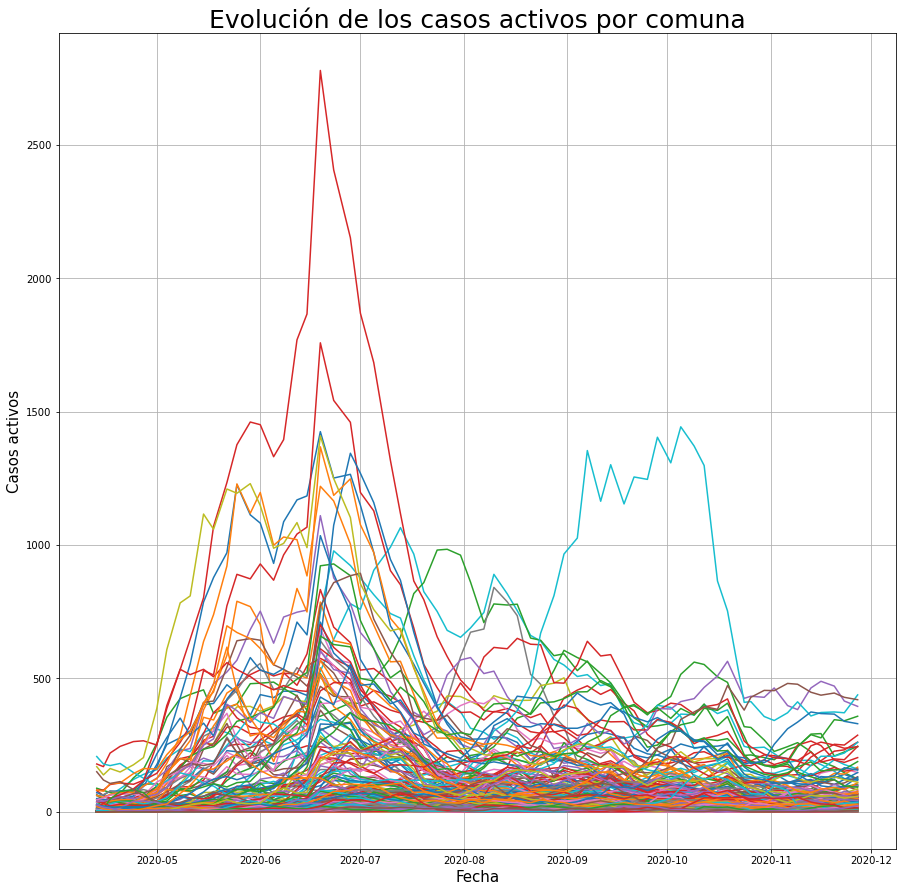

In [13]:
fig = plt.figure(figsize=(15,15))

activos_group = (activos.groupby(['comuna', 'fecha']).sum().reset_index())

for comuna in activos_group['comuna'].unique():
    df = activos_group[activos_group['comuna']==comuna]
    plt.plot(df['fecha'], df['casos_activos'])
    
plt.title('Evolución de los casos activos por comuna', fontsize=25)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Casos activos', fontsize=15)
plt.grid()
plt.show()

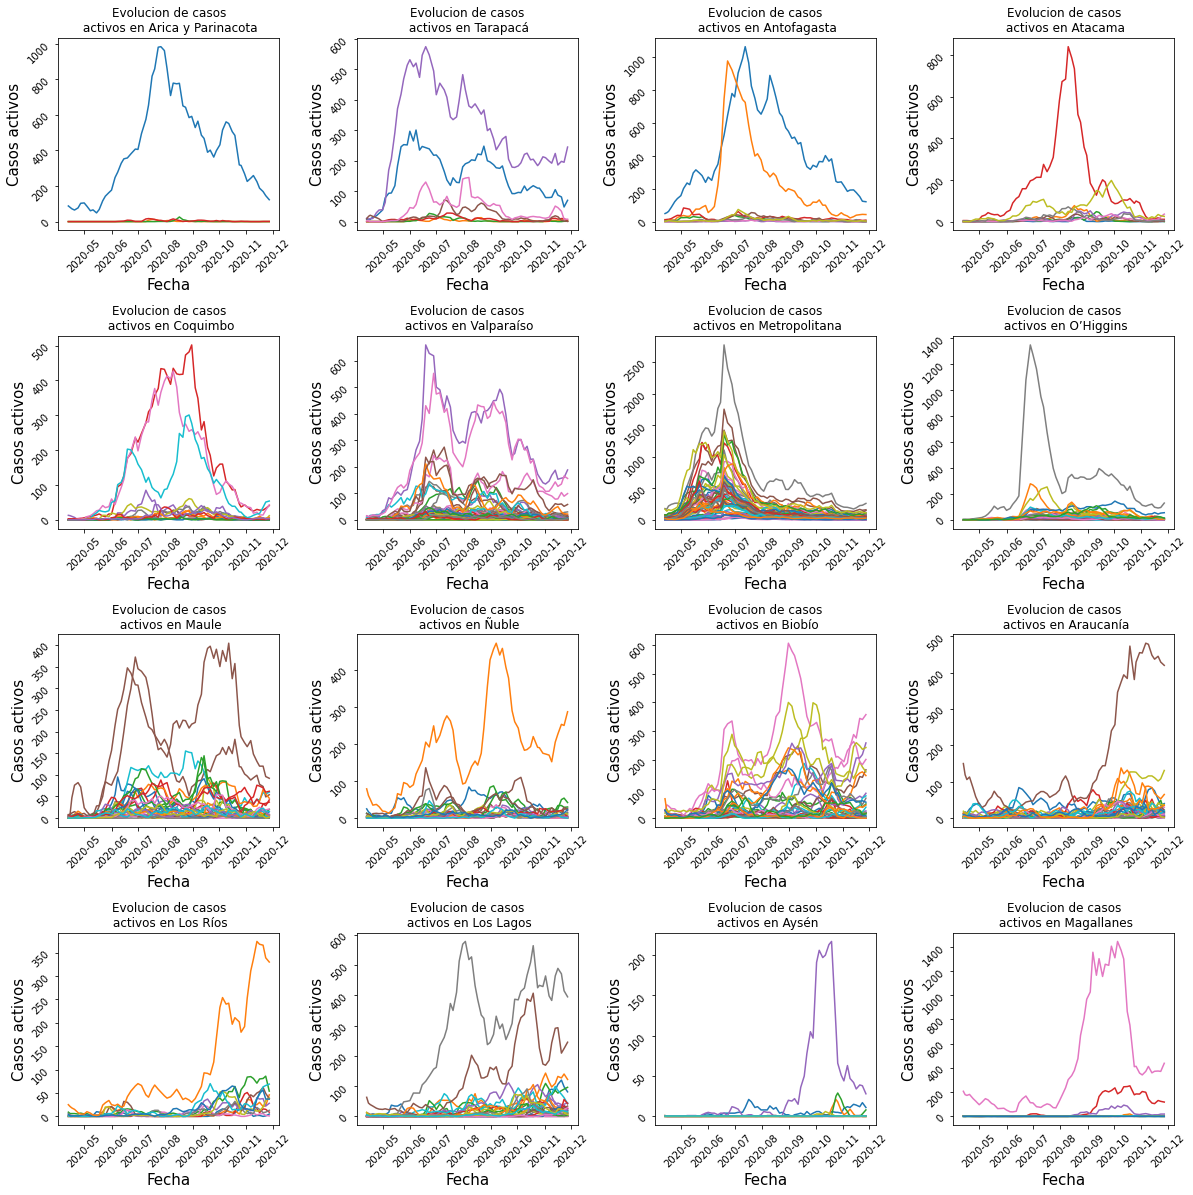

In [14]:
fig, axx = plt.subplots(4,4, figsize=(20,20))
plt.subplots_adjust(wspace = 0.35, hspace = 0.55)
i = 0

region_names_activos = {
    'Tarapaca': 'Tarapacá', 
    'Valparaiso': 'Valparaíso',
    'Del Libertador General Bernardo O’Higgins': 'O’Higgins',
    'Nuble': 'Ñuble',
    'Biobio': 'Biobío', 
    'La Araucania': 'Araucanía', 
    'Los Rios': 'Los Ríos', 
    'Aysen': 'Aysén',
    'Magallanes y la Antartica': 'Magallanes'
}

activos_aux = activos.replace(region_names_activos)
for region in activos_aux['region'].unique():
    ax = axx[i//4, i%4]
    df = activos_aux[activos_aux['region']==region]
    df = (df.groupby(['comuna', 'fecha']).sum().reset_index())
    
    for comuna in df['comuna'].unique():
        df2 = df[df['comuna']==comuna]
        ax.plot(df2['fecha'], df2['casos_activos'])
        
    ax.set_title(f'Evolucion de casos\n activos en {region}')
    ax.set_xlabel('Fecha', fontsize=15)
    ax.set_ylabel('Casos activos', fontsize=15)
    ax.tick_params(labelrotation=45)
    i += 1

plt.show()

**Comentarios:** Para el primer caso, una ventaja es permitir comparar entre distintas regiones la evolución de los casos activos, mientras que un problema es la gran cantidad de comunas que se consideran el gráfico.

En el segundo caso, el estudio nos permitirá obtener información más "local" de los casos activos, es decir, más regional. Sin embargo, se debe tener en cuenta que las regiones en sí no son comparables, puesto que las escalas de casos activos no son iguales.

## Ejercicio 8

(10 puntos)

Hacer un gráfico que permita comparar rápidamente entre regiones su promedio de casos activos , máximo de casos confirmados y fallecidos. Utiliza los valores reales y apoyarlos con colores.

Se adjunta el diccionario `region_names` con tal de reemplazar los nombres de las regiones en los datos `fallecidos` para poder unir con los otros datos. 

In [15]:
region_names_activos = {
    'Tarapaca': 'Tarapacá', 
    'Valparaiso': 'Valparaíso',
    'Del Libertador General Bernardo O’Higgins': 'O’Higgins',
    'Nuble': 'Ñuble',
    'Biobio': 'Biobío', 
    'La Araucania': 'Araucanía', 
    'Los Rios': 'Los Ríos', 
    'Aysen': 'Aysén',
    'Magallanes y la Antartica': 'Magallanes'
}

region_names_confirmados = {
    'Tarapacá': 'Tarapacá', 
    'Metropolitana de Santiago': 'Metropolitana',
    "Libertador General Bernardo O'Higgins": 'O’Higgins', 
    'La Araucanía': 'Araucanía',
    'Aysén del General Carlos Ibáñez del Campo': 'Aysén',
    'Magallanes y de la Antártica Chilena': 'Magallanes'
}

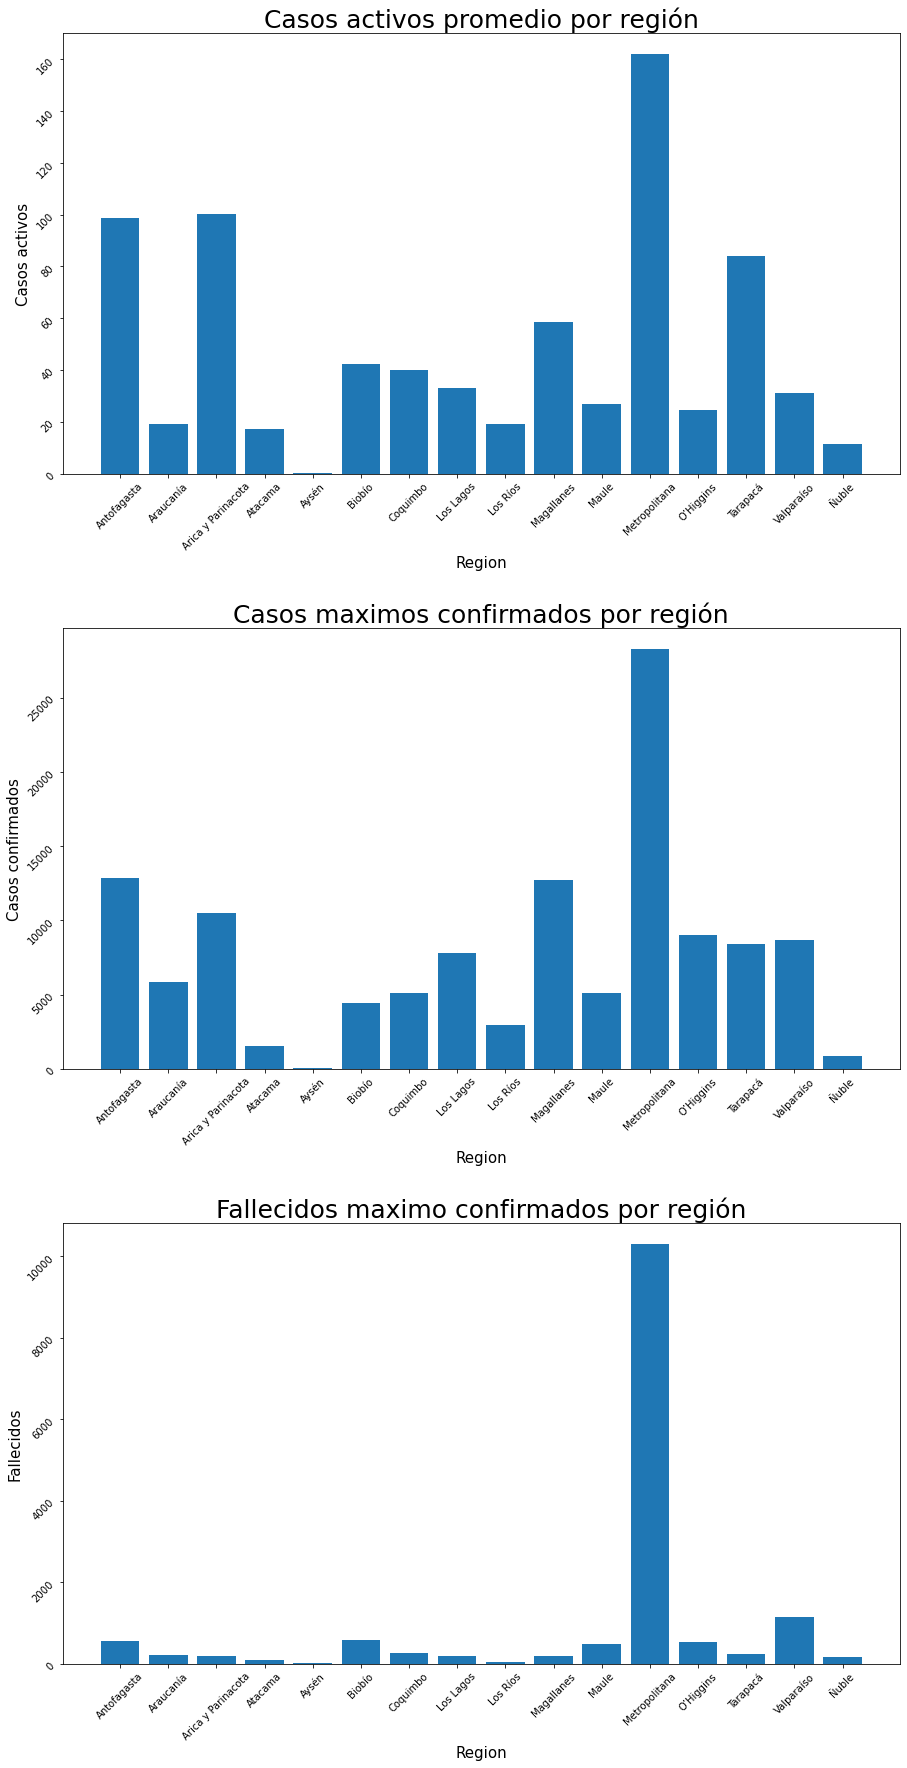

In [16]:
fallecidos_fixed = fallecidos[fallecidos['region']!='Total']
activos_fixed = activos.replace(region_names_activos)
confirmados_fixed = confirmados.replace(region_names_confirmados)

df_merge = fallecidos_fixed.merge(activos_fixed, on=['region', 'fecha'], how='outer')
df_merge = (df_merge.merge(confirmados_fixed, 
               on=['region', 'fecha', 'comuna', 'poblacion'], 
               how='inner'))
df_merge2 = (df_merge.drop(columns=['comuna_id','provincia_id','provincia'])
      .groupby('region')
      .aggregate({'casos_activos': 'mean',
                 'casos_confirmados': 'max',
                 'fallecidos': 'max'})
      .reset_index()
)
        
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(15,30))
plt.subplots_adjust(hspace = 0.35)

ax1.bar(df_merge2['region'], df_merge2['casos_activos'])
ax1.set_title(f'Casos activos promedio por región', fontsize=25)
ax1.set_xlabel('Region', fontsize=15)
ax1.set_ylabel('Casos activos', fontsize=15)
ax1.tick_params(labelrotation=45)
ax2.bar(df_merge2['region'], df_merge2['casos_confirmados'])
ax2.set_title(f'Casos maximos confirmados por región', fontsize=25)
ax2.set_xlabel('Region', fontsize=15)
ax2.set_ylabel('Casos confirmados', fontsize=15)
ax2.tick_params(labelrotation=45)
ax3.bar(df_merge2['region'], df_merge2['fallecidos'])
ax3.set_title(f'Fallecidos maximo confirmados por región', fontsize=25)
ax3.set_xlabel('Region', fontsize=15)
ax3.set_ylabel('Fallecidos', fontsize=15)
ax3.tick_params(labelrotation=45)
    
plt.show()

## Ejercicio 9


En este ejercicio buscaremos realizar un mini-dashboard respecto al estado de los casos de COVID-19 en Chile, por lo tanto utilizaremos haremos uso de datos geográficos de manera operacional (es decir, no nos preocuparemos de proyecciones en mapas ni nada por el estilo), lo único es que debes instalar `geopandas` en tu ambiente virtual y no olvidar actualizarlo en tu `environment.yml` para luego subirlo a tu repositorio de GitHub.

Con tu ambiente activo (`conda activate mat281`) basta con ejecutar `conda install -c conda-forge geopandas` para instalar `geopandas`.

In [17]:
import geopandas as gpd
from pathlib import Path

In [18]:
shp_filepath = Path().resolve().parent / "data" / "regiones_chile.shp"
regiones = gpd.read_file(shp_filepath)
regiones.head()

,geometry
0,"POLYGON ((-7873736.745 -3885505.642, -7873695...."
1,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
2,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
3,"MULTIPOLYGON (((-7900342.628 -3153340.296, -79..."
4,"MULTIPOLYGON (((-8208500.834 -5733817.475, -82..."


In [19]:
type(regiones)

geopandas.geodataframe.GeoDataFrame

Lo único que tienes que saber es que un `GeoDataFrame` es idéntico a un `DataFrame` salvo que debe poseer una columna llamada `geometry` caracterice los elementros geométricos, que en este casos son polígonos con los límites de las regiones de Chile. 

Para graficar mapas en Altair se debe usar `mark_geoshape`, además, para no preocuparnos de las proyecciones si o si debes declarar lo siguiente que se muestra en la siguiente celda en las propiedades del gráfico. El resto es igual a cualquier otro gráfico de Altair.

In [ ]:
alt.Chart(regiones).mark_geoshape().encode(
).properties(
    projection={'type': 'identity', 'reflectY': True},
    width=250,
    height=600
)

### Ejercicio 9.1

(10 puntos)

Define el `DataFrame` con el nombre `casos_geo` tal que tenga las columnas

* `region`
* `codigo_region`
* `fecha`
* `poblacion`
* `casos_confirmados`
* `tasa`
* `casos_activos`
* `fallecidos`
* `geometry`

Ten mucho cuidado como unes los dataframes `confirmados`, `activos`, `fallecidos` y `regiones`. Idealmente utilizar el código de región, pero en caso que no se encuentren disponibles utilizar el nombre de la región (no olivdar utilizar el diccionario `region_names`).

In [21]:
order = [13,2,15,3,11,4,9,10,14,12,1,5,16,8,6,7]
fallecidos_fixed = fallecidos[fallecidos['region']!='Total']

activos_fixed = (activos.groupby(['codigo_region', 'fecha'])
                             .aggregate({'casos_activos': 'sum', 'poblacion': 'sum', 'region': 'max'})
                             .reset_index()
                    )

confirmados_fixed = (confirmados.rename(columns={'region_id': 'codigo_region'}).groupby(['codigo_region', 'fecha'])
                              .aggregate({'casos_confirmados': 'sum', 'region': 'max'})
                              .reset_index()
                     )

activos_fixed = activos_fixed.replace(region_names_activos)
confirmados_fixed = confirmados_fixed.replace(region_names_confirmados)
regiones['codigo_region'] = order

casos_geo = (activos_fixed.merge(confirmados_fixed, 
                                     on=['codigo_region', 'region', 'fecha'], 
                                     how='inner')
                             .merge(fallecidos_fixed,
                                    on=['region', 'fecha'], 
                                     how='inner')
                             .merge(regiones,
                                   on=['codigo_region'],
                                   how='inner')
             )

casos_geo['tasa'] = casos_geo['casos_confirmados']/casos_geo['poblacion']*100000
casos_geo

,codigo_region,fecha,casos_activos,poblacion,region,casos_confirmados,fallecidos,geometry,tasa
0,1,2020-04-13,30.0,382773.0,Tarapacá,52.0,0.0,"MULTIPOLYGON (((-7807680.075 -2295867.719, -78...",13.585075
1,1,2020-04-15,35.0,382773.0,Tarapacá,62.0,0.0,"MULTIPOLYGON (((-7807680.075 -2295867.719, -78...",16.197590
2,1,2020-04-17,38.0,382773.0,Tarapacá,73.0,0.0,"MULTIPOLYGON (((-7807680.075 -2295867.719, -78...",19.071356
3,1,2020-04-20,42.0,382773.0,Tarapacá,93.0,0.0,"MULTIPOLYGON (((-7807680.075 -2295867.719, -78...",24.296385
4,1,2020-04-24,61.0,382773.0,Tarapacá,130.0,0.0,"MULTIPOLYGON (((-7807680.075 -2295867.719, -78...",33.962688
...,...,...,...,...,...,...,...,...,...
1051,16,2020-11-13,390.0,511551.0,Ñuble,10562.0,162.0,"POLYGON ((-8053806.540 -4431488.942, -8053866....",2064.701271
1052,16,2020-11-16,429.0,511551.0,Ñuble,10761.0,163.0,"POLYGON ((-8053806.540 -4431488.942, -8053866....",2103.602573
1053,16,2020-11-20,476.0,511551.0,Ñuble,11022.0,168.0,"POLYGON ((-8053806.540 -4431488.942, -8053866....",2154.623879
1054,16,2020-11-23,492.0,511551.0,Ñuble,11240.0,172.0,"POLYGON ((-8053806.540 -4431488.942, -8053866....",2197.239376


Ejecuta lo siguiente para convertir el DataFrame anterior en un GeoDataFrames

In [22]:
casos_geo = casos_geo.pipe(lambda x: gpd.GeoDataFrame(x, geometry="geometry"))

### Ejercicio 9.2

(5 puntos)

Modifica la función `covid_chile_chart` tal que reciba una fecha y una columna. Luego, debe filtrar `casos_geo` con registros de la fecha seleccionada y graficar un mapa donde las regiones se colereen según la columna escogida. 

In [23]:
def covid_chile_chart(fecha, col):
    
    fecha = pd.to_datetime(fecha)
    data = casos_geo[casos_geo['fecha']==fecha]
    
    chart = (alt.Chart(data).mark_geoshape().
             encode(
                 color=f'{col}:Q'
            )
             .properties(
                projection={'type': 'identity', 'reflectY': True},
                width=150,
                height=400
                )
    )
    
    chart.display()
    return

Prueba con lo siguiente

In [ ]:
fecha = "2020-04-13"
col = "tasa"
covid_chile_chart(fecha, col)

### Ejercicio 9.3

(5 puntos)

Ahora utilizando `widgets` generaremos el dashboard interactivo. Define lo siguiente:

* col_widget: Un `widgets.Dropdown` donde las opciones a seleccionar sean las columnas `poblacion`, `casos_confirmados`, `tasa`, `casos_activos` y `fallecidos`. Además, el argumento `description` debe ser `Columna`.
* fecha_widget: Un `widgets.DatePicker` donde el argumento `description` sea `Fecha`.
* Ambos widgets deben tener el argumento `continuous_update=False`

In [25]:
import ipywidgets as widgets
from ipywidgets import interactive, interact

In [26]:
col_widget = widgets.Dropdown(
    options=[('Población', 'poblacion'), ('Casos confirmados', 'casos_confirmados'), ('Tasa de incidencia', 'tasa'), 
             ('Casos activos', 'casos_activos'), ('Fallecidos', 'fallecidos')],
    value = 'poblacion',
    description='Columna',
    continuous_update=False
)

In [27]:
import datetime

fecha_widget = widgets.DatePicker(
    description='Fecha',
    value = datetime.date(2020,4,13),
    continuous_update=False
)

Finalmente, haciendo uso de `interactive`, la función `covid_chile_chart` y todos los widgets es posible crear un _dashboard_ interactivo con los datos de Covid-19.

Respira profundo y explora tu creación!

In [ ]:
covid_dashboard = interactive(
    covid_chile_chart,
    fecha = fecha_widget,
    col = col_widget
)
covid_dashboard